In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


Text(0.5, 1.0, '3 Paths of a Standard Brownian Motion (Bt)')

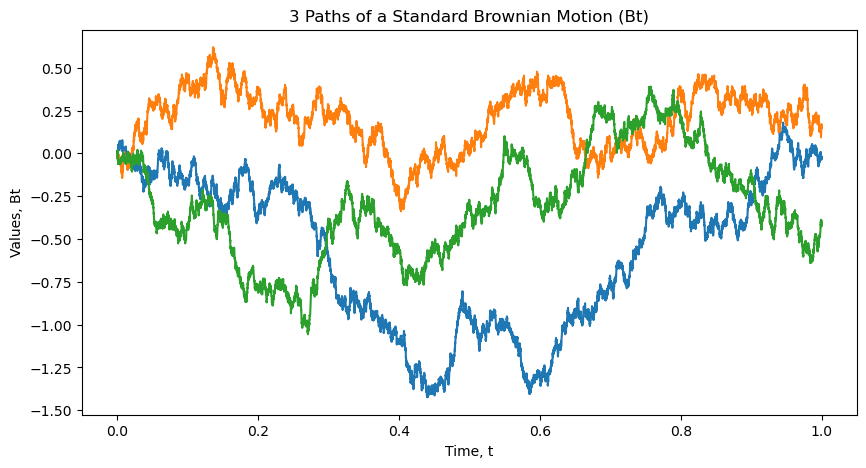

In [5]:
steps = 10000
paths = 3

def standard_Brownian_motion(t, steps, paths):
    dt = t/steps # small subintervals
    paths_3 = [] # a list store values of 3 paths
    for i in range(paths): # loop for 3 paths
        Bt = 0 # let Bt start from 0
        values=[0]
        for n in range(steps):
            Z = np.random.normal(0, 1)  # standard Brownian motion follows a normal distribution
            Bdt = np.sqrt(dt)*Z
            Bt += Bdt # increment each time
            values.append(Bt) # store the values of a path hit
        paths_3.append(values)
    return paths_3

simulation = standard_Brownian_motion(1, steps, paths)

# plot
plt.figure(figsize=(10, 5))
times = np.linspace(0, 1, steps+1)
for path in simulation:
    plt.plot(times, path)

plt.xlabel('Time, t')
plt.ylabel('Values, Bt')
plt.title('3 Paths of a Standard Brownian Motion (Bt)')

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

Text(0.5, 1.0, '2-Dimensional Standard Brownian Motion')

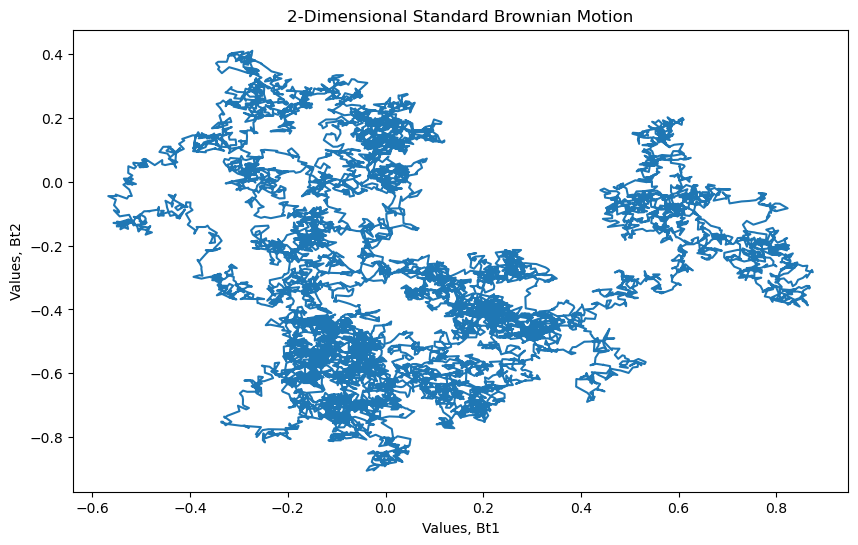

In [10]:
Bt1 = standard_Brownian_motion(1, 10000, 1) # let it be the value on the X-axis
Bt2 = standard_Brownian_motion(1, 10000, 1) # let it be the value on the Y-axis
plt.figure(figsize=(10, 6))
plt.plot(Bt1[0], Bt2[0])
plt.xlabel('Values, Bt1')
plt.ylabel('Values, Bt2')
plt.title('2-Dimensional Standard Brownian Motion')

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



3. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

Text(0.5, 1.0, 'Simulation of Geometric Brownian Motion (St)')

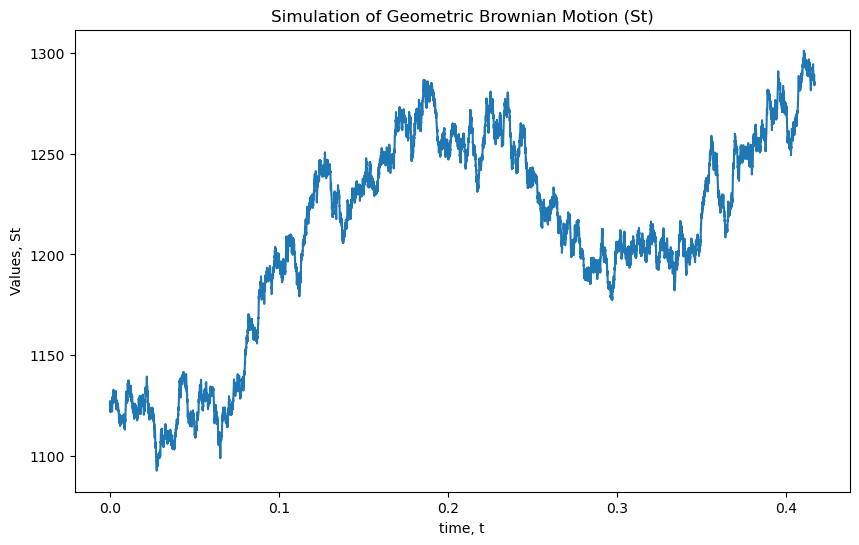

In [12]:
mu = 0.1
sigma = 0.176
S0 = 1125

# a function that generate Xt first
def Brownian_motion_wdrift(T, steps):
    t_s = np.linspace(0, T, steps+1)
    B = standard_Brownian_motion(T, steps, 1)[0] # get standard brownian motion first
    Xt = mu*t_s + sigma*np.array(B) # Brownian motion with drift
    return t_s, Xt
t_s, Xt = Brownian_motion_wdrift(5/12, 10000) # return the time and Xt value

# plug Xt in to get the geometric brownian motion
def geometric_Brownian_motion(Xt):
    St = S0*np.exp(Xt)
    return St
St = geometric_Brownian_motion(Xt)

plt.figure(figsize=(10, 6))
plt.plot(t_s, St)
plt.xlabel('time, t')
plt.ylabel('Values, St')
plt.title('Simulation of Geometric Brownian Motion (St)')

4. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [13]:
payoffs = [] # create a list to store the payoff for each simulation
simulation_times = 10000
for i in range(simulation_times):
    t_s, Xt = Brownian_motion_wdrift(5/12, 10000)
    St = geometric_Brownian_motion(Xt) # price follows geometric brownian motion
    payoff = St[-1] - min(St) # S(5/12) - min(St)
    payoffs.append(payoff)
    
mean = sum(payoffs)/simulation_times
mean 

131.9093909328247